In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]


11490434/11490434 [==============================] - 1s 0us/step


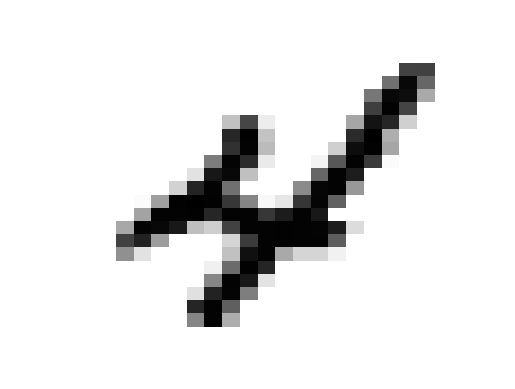

In [ ]:
plt.pcolor( 1-x_train[9,::-1,:] , cmap = 'gray' );
plt.axis('off');

In [ ]:
y_train[9]

4

In [ ]:
x_train = x_train.reshape((ndata_train,28,28,1))
x_test = x_test.reshape((ndata_test,28,28,1))


xshape = x_train.shape[1:4]
xshape


(28, 28, 1)

In [ ]:
NNmodel2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=24, kernel_size=(5, 5), activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [ ]:
training_loss = []
training_accuracy = []
validation_loss = []
validation_accuracy = []
epochs = []

In [ ]:
NNmodel2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NNmodel2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 24)        624       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 24)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        6944      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [ ]:
history = NNmodel2.fit(x_train,y_train,epochs=100,validation_split=0.2,batch_size=600)

Epoch 1/100
80/80 [==============================] - 5s 9ms/step - loss: 0.6195 - accuracy: 0.8332 - val_loss: 0.1758 - val_accuracy: 0.9503
Epoch 2/100
80/80 [==============================] - 0s 5ms/step - loss: 0.1373 - accuracy: 0.9600 - val_loss: 0.0994 - val_accuracy: 0.9707
Epoch 3/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0839 - accuracy: 0.9746 - val_loss: 0.0761 - val_accuracy: 0.9772
Epoch 4/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0638 - accuracy: 0.9811 - val_loss: 0.0638 - val_accuracy: 0.9818
Epoch 5/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0517 - accuracy: 0.9842 - val_loss: 0.0602 - val_accuracy: 0.9820
Epoch 6/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0451 - accuracy: 0.9864 - val_loss: 0.0545 - val_accuracy: 0.9852
Epoch 7/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0404 - accuracy: 0.9878 - val_loss: 0.0456 - val_accuracy: 0.9870
Epoch 8/100
8

In [ ]:
training_loss.extend(history.history['loss'])
training_accuracy.extend(history.history['accuracy'])
validation_loss.extend(history.history['val_loss'])
validation_accuracy.extend(history.history['val_accuracy'])
epochs.extend(range(1, len(history.history['loss']) + 1))

In [ ]:
pred_probs2 = NNmodel2.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
print(np.mean(pred2==y_test))

313/313 [==============================] - 1s 3ms/step
0.9919


In [ ]:
NNmodel2.save("CNN_Model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files

# Assuming your model file is named 'my_model.h5'
files.download('CNN_Model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

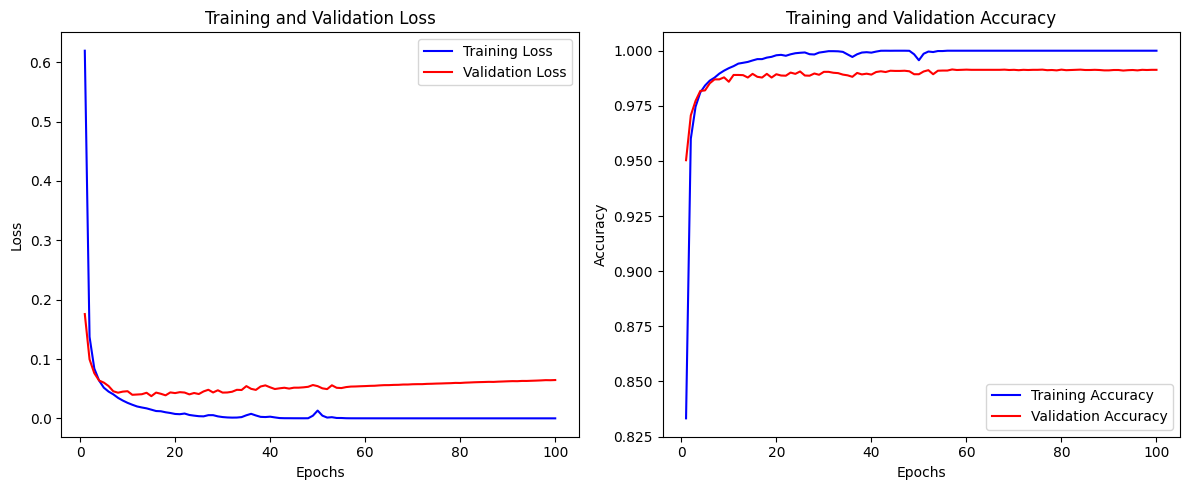

In [ ]:
import matplotlib.pyplot as plt

# Plot the training curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b-', label='Training Loss')
plt.plot(epochs, validation_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files

In [ ]:
pip install pydot graphviz

In [ ]:
from tensorflow.keras.utils import plot_model

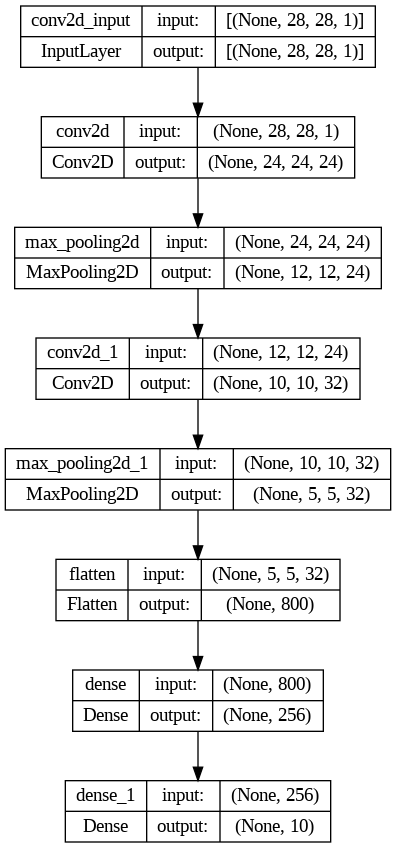

In [ ]:
# Save model summary to a file
with open('model_summary.txt', 'w') as f:
    NNmodel2.summary(print_fn=lambda x: f.write(x + '\n'))

# Plot the model architecture and save it as an image
plot_model(NNmodel2, to_file='cnn_model_architecture.png', show_shapes=True, show_layer_names=True)

In [ ]:
files.download('cnn_model_architecture.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Create DataFrame from arrays
training_df = pd.DataFrame({
    'Epochs': epochs,
    'Training Loss': training_loss,
    'Training Accuracy': training_accuracy,
    'Validation Loss': validation_loss,
    'Validation Accuracy': validation_accuracy
})


In [ ]:
training_df.to_csv("CNN_training_df.csv")
files.download('CNN_training_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>